In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [101]:
df_train = pd.read_csv('censusdataset.csv')

In [102]:
df_test = pd.read_csv('censustrain.csv', skiprows=1)

In [103]:
df_train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [104]:
df_train.columns = ['age','workclass','fnlgwt','education','education num','marital status','occupation','relationship','race','sex','capital gain','capital loss','hours-per-week','native country','Income']

In [105]:
df_train.head()

,age,workclass,fnlgwt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [106]:
df_test.columns = ['age','workclass','fnlgwt','education','education num','marital status','occupation','relationship','race','sex','capital gain','capital loss','hours-per-week','native country','Income']

In [107]:
df_test.head()

,age,workclass,fnlgwt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [108]:
df_train.shape

(32560, 15)

In [109]:
df_test.shape

(16280, 15)

In [110]:
df=pd.concat([df_train, df_test])

In [111]:
df.shape

(48840, 15)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 16279
Data columns (total 15 columns):
age               48840 non-null int64
workclass         48840 non-null object
fnlgwt            48840 non-null int64
education         48840 non-null object
education num     48840 non-null int64
marital status    48840 non-null object
occupation        48840 non-null object
relationship      48840 non-null object
race              48840 non-null object
sex               48840 non-null object
capital gain      48840 non-null int64
capital loss      48840 non-null int64
hours-per-week    48840 non-null int64
native country    48840 non-null object
Income            48840 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [113]:
df.describe()

,age,fnlgwt,education num,capital gain,capital loss,hours-per-week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
df.replace(' ?', np.nan, inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 16279
Data columns (total 15 columns):
age               48840 non-null int64
workclass         46041 non-null object
fnlgwt            48840 non-null int64
education         48840 non-null object
education num     48840 non-null int64
marital status    48840 non-null object
occupation        46031 non-null object
relationship      48840 non-null object
race              48840 non-null object
sex               48840 non-null object
capital gain      48840 non-null int64
capital loss      48840 non-null int64
hours-per-week    48840 non-null int64
native country    47983 non-null object
Income            48840 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [116]:
for columns in ['workclass', 'occupation', 'native country']:
    df[columns].fillna(df[columns].mode()[0], inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 16279
Data columns (total 15 columns):
age               48840 non-null int64
workclass         48840 non-null object
fnlgwt            48840 non-null int64
education         48840 non-null object
education num     48840 non-null int64
marital status    48840 non-null object
occupation        48840 non-null object
relationship      48840 non-null object
race              48840 non-null object
sex               48840 non-null object
capital gain      48840 non-null int64
capital loss      48840 non-null int64
hours-per-week    48840 non-null int64
native country    48840 non-null object
Income            48840 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [118]:
df['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [119]:
df['Income']=df['Income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})

In [120]:
df.head()

,age,workclass,fnlgwt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


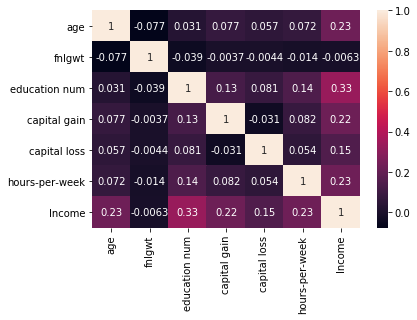

In [121]:
sns.heatmap(df.corr(),annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


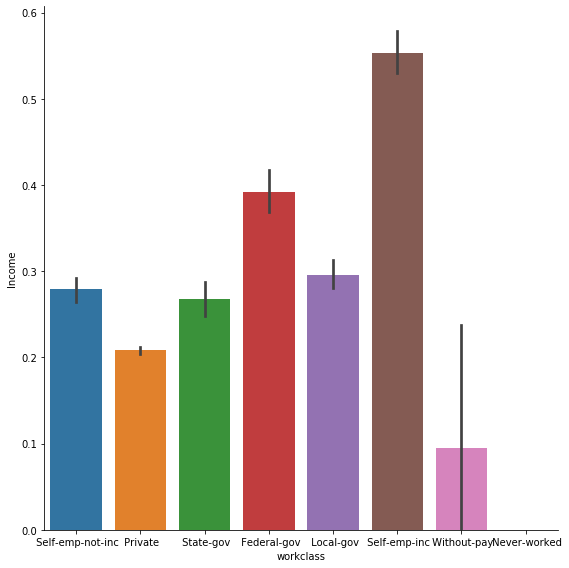

In [122]:
sns.factorplot(x="workclass", y="Income", data=df, kind="bar",size=8)

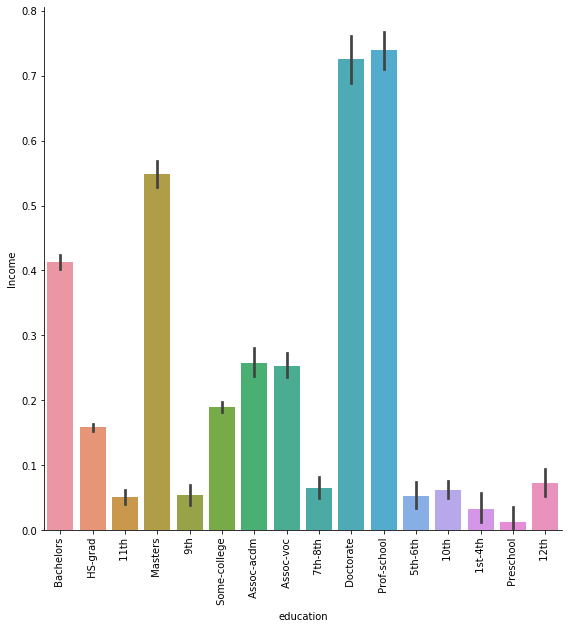

In [123]:
sns.factorplot(x="education",y="Income",data=df,kind="bar",size=8)
plt.xticks(rotation=90);

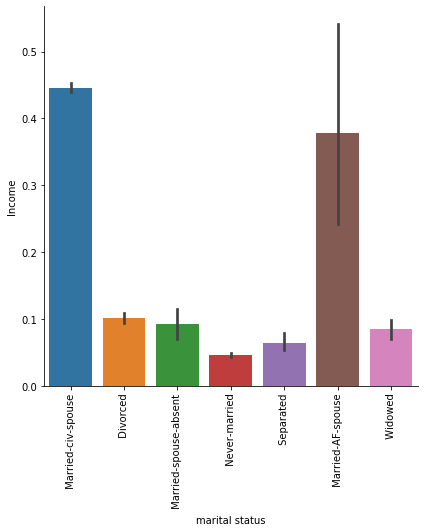

In [124]:
sns.factorplot(x="marital status",y="Income",data=df,kind="bar", size = 6)
plt.xticks(rotation=90);

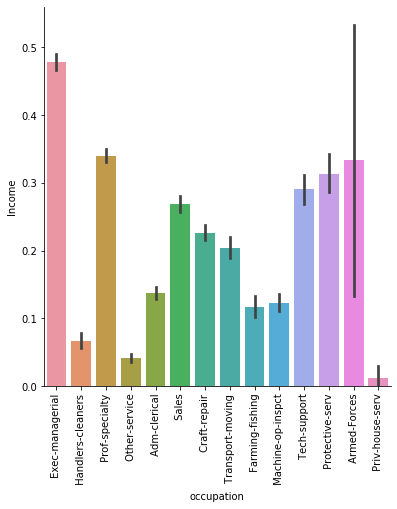

In [125]:
sns.factorplot(x="occupation",y="Income",data=df,kind="bar", size = 6)
plt.xticks(rotation=90);

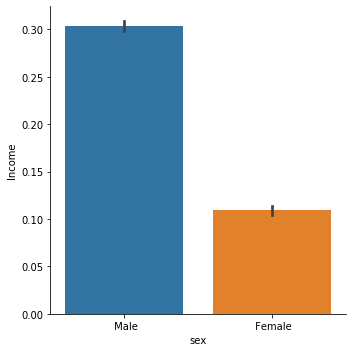

In [126]:
sns.factorplot(x="sex",y="Income",data=df,kind="bar")

In [127]:
D1= pd.get_dummies(df['workclass'])
df1=pd.concat([df,D1],axis=1)

In [128]:
D2= pd.get_dummies(df['education'])
df1=pd.concat([df,D2],axis=1)


In [129]:
D3= pd.get_dummies(df['marital status'])
df1=pd.concat([df,D3],axis=1)

In [130]:
D4= pd.get_dummies(df['occupation'])
df1=pd.concat([df,D4],axis=1)

In [131]:
D5= pd.get_dummies(df['relationship'])
df1=pd.concat([df,D5],axis=1)

In [132]:
D6= pd.get_dummies(df['race'])
df1=pd.concat([df,D6],axis=1)

In [133]:
D7= pd.get_dummies(df['sex'])
df1=pd.concat([df,D7],axis=1)

In [134]:
D8= pd.get_dummies(df['native country'])
df1=pd.concat([df,D8],axis=1)

In [135]:
cols = df1.columns.tolist()
cols

['age',
 'workclass',
 'fnlgwt',
 'education',
 'education num',
 'marital status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital gain',
 'capital loss',
 'hours-per-week',
 'native country',
 'Income',
 ' Cambodia',
 ' Canada',
 ' China',
 ' Columbia',
 ' Cuba',
 ' Dominican-Republic',
 ' Ecuador',
 ' El-Salvador',
 ' England',
 ' France',
 ' Germany',
 ' Greece',
 ' Guatemala',
 ' Haiti',
 ' Holand-Netherlands',
 ' Honduras',
 ' Hong',
 ' Hungary',
 ' India',
 ' Iran',
 ' Ireland',
 ' Italy',
 ' Jamaica',
 ' Japan',
 ' Laos',
 ' Mexico',
 ' Nicaragua',
 ' Outlying-US(Guam-USVI-etc)',
 ' Peru',
 ' Philippines',
 ' Poland',
 ' Portugal',
 ' Puerto-Rico',
 ' Scotland',
 ' South',
 ' Taiwan',
 ' Thailand',
 ' Trinadad&Tobago',
 ' United-States',
 ' Vietnam',
 ' Yugoslavia']

In [136]:
df1.drop(['workclass', 'education','marital status','occupation','relationship','race','sex','native country'], axis = 1,inplace=True) 

In [137]:
x = df1.drop(['Income'], axis=1)
y = df1['Income']

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)


In [140]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test, predlr))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7996177996177997


In [141]:
x = df1.drop(['Income','fnlgwt'], axis=1)
y = df1['Income']

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [144]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8191373191373191
[[10657   522]
 [ 2128  1345]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11179
           1       0.72      0.39      0.50      3473

    accuracy                           0.82     14652
   macro avg       0.78      0.67      0.70     14652
weighted avg       0.81      0.82      0.80     14652



In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8241195741195741


In [146]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [147]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [148]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8453453453453453

In [150]:
from sklearn.externals import joblib 
joblib.dump(model, 'census.pkl') 
model_from_joblib = joblib.load('census.pkl')   
model_from_joblib.predict(x_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)